7组数据先拿前6组按5：1进行5次5折交叉训练就是5组模型，最后再用第7组验证模型最好的

In [79]:
import pandas as pd

data_1 = pd.read_excel("data1.xlsx")
data_2 = pd.read_excel("data2.xlsx")

In [82]:
def ModelPredict(data):
#数据分割 X为训练集
    X = data.iloc[:6,1:3]
    y_a =  data.iloc[:6,3:4]
    y_b =  data.iloc[:6,4:5]
    y_c =  data.iloc[:6,5:6]
    y_B =  data.iloc[:6,6:7]
    y_G =  data.iloc[:6,7:8]
    test_x = data.iloc[6:7,1:3]
    
    #多元线性回归预测
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    model = LinearRegression()
    model.fit(X,y_a)
    pre_a = model.predict(test_x)
    print("回归模型有关a的预测中线性参数为",model.coef_,"截距为",model.intercept_)
    model.fit(X,y_b)
    pre_b = model.predict(test_x)
    print("回归模型有关b的预测中线性参数为",model.coef_,"截距为",model.intercept_)
    model.fit(X,y_c)
    pre_c = model.predict(test_x)
    print("回归模型有关c的预测中线性参数为",model.coef_,"截距为",model.intercept_)
    
    #GBDT预测
    import matplotlib.pyplot as plt
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import GridSearchCV
    model = GradientBoostingRegressor()    
    #Choose all predictors except target & IDcols
    param_test1 = {'n_estimators':range(1,100)}
    params = range(1,100)
    gsearch1 = GridSearchCV(estimator = model,param_grid = param_test1,scoring='neg_mean_absolute_error')
    gsearch1.fit(X,y_B)#     #XGBOOST预测
    print(gsearch1.cv_results_['params'],gsearch1.cv_results_['mean_test_score'])
    plt.figure()
    plt.plot(params,gsearch1.cv_results_['mean_test_score'])
    plt.title("GBDT")
    plt.show()
    
#     XGBOOST预测
    
    import xgboost as xgb
    model = xgb.XGBRegressor()
    param_test1 = {'n_estimators':range(1,100)}
    params = range(1,100)
    gsearch1 = GridSearchCV(estimator = model,param_grid = param_test1,scoring='neg_mean_absolute_error')
    gsearch1.fit(X,y_B)#     #XGBOOST预测
    print(gsearch1.cv_results_['params'],gsearch1.cv_results_['mean_test_score'])
    plt.figure()
    plt.plot(params,gsearch1.cv_results_['mean_test_score'])
    plt.title("XGBOOST")
    plt.show()

回归模型有关a的预测中线性参数为 [[ 0.2952 -0.2952]] 截距为 [3.86553333]
回归模型有关b的预测中线性参数为 [[ 0.2848 -0.2848]] 截距为 [3.85196667]
回归模型有关c的预测中线性参数为 [[ 0.2852 -0.2852]] 截距为 [3.85886667]


D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[{'n_estimators': 1}, {'n_estimators': 2}, {'n_estimators': 3}, {'n_estimators': 4}, {'n_estimators': 5}, {'n_estimators': 6}, {'n_estimators': 7}, {'n_estimators': 8}, {'n_estimators': 9}, {'n_estimators': 10}, {'n_estimators': 11}, {'n_estimators': 12}, {'n_estimators': 13}, {'n_estimators': 14}, {'n_estimators': 15}, {'n_estimators': 16}, {'n_estimators': 17}, {'n_estimators': 18}, {'n_estimators': 19}, {'n_estimators': 20}, {'n_estimators': 21}, {'n_estimators': 22}, {'n_estimators': 23}, {'n_estimators': 24}, {'n_estimators': 25}, {'n_estimators': 26}, {'n_estimators': 27}, {'n_estimators': 28}, {'n_estimators': 29}, {'n_estimators': 30}, {'n_estimators': 31}, {'n_estimators': 32}, {'n_estimators': 33}, {'n_estimators': 34}, {'n_estimators': 35}, {'n_estimators': 36}, {'n_estimators': 37}, {'n_estimators': 38}, {'n_estimators': 39}, {'n_estimators': 40}, {'n_estimators': 41}, {'n_estimators': 42}, {'n_estimators': 43}, {'n_estimators': 44}, {'n_estimators': 45}, {'n_estimators': 4

D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\4_code\1_anaconda\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

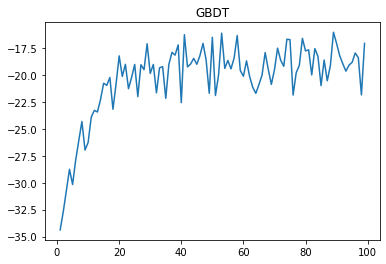

[{'n_estimators': 1}, {'n_estimators': 2}, {'n_estimators': 3}, {'n_estimators': 4}, {'n_estimators': 5}, {'n_estimators': 6}, {'n_estimators': 7}, {'n_estimators': 8}, {'n_estimators': 9}, {'n_estimators': 10}, {'n_estimators': 11}, {'n_estimators': 12}, {'n_estimators': 13}, {'n_estimators': 14}, {'n_estimators': 15}, {'n_estimators': 16}, {'n_estimators': 17}, {'n_estimators': 18}, {'n_estimators': 19}, {'n_estimators': 20}, {'n_estimators': 21}, {'n_estimators': 22}, {'n_estimators': 23}, {'n_estimators': 24}, {'n_estimators': 25}, {'n_estimators': 26}, {'n_estimators': 27}, {'n_estimators': 28}, {'n_estimators': 29}, {'n_estimators': 30}, {'n_estimators': 31}, {'n_estimators': 32}, {'n_estimators': 33}, {'n_estimators': 34}, {'n_estimators': 35}, {'n_estimators': 36}, {'n_estimators': 37}, {'n_estimators': 38}, {'n_estimators': 39}, {'n_estimators': 40}, {'n_estimators': 41}, {'n_estimators': 42}, {'n_estimators': 43}, {'n_estimators': 44}, {'n_estimators': 45}, {'n_estimators': 4

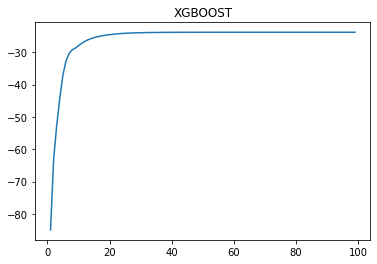

In [83]:
ModelPredict(data_1)